In [ ]:
# general imports
import matplotlib.pyplot as plt
%matplotlib inline

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit
from braket.devices import LocalSimulator

In [ ]:
# define circuit with 4 qubits
my_circuit = Circuit().h(range(4)).cnot(control=0, target=2).cnot(control=1, target=3)
print(my_circuit)

## Submit the circuit to the local simulator and obtain the results

Here we submit our circuit to the local simulator and obtain the results.

In [ ]:
# set up the on-demand simulator SV1
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")

In [ ]:
# set up device
device = LocalSimulator()

# run circuit
result = device.run(my_circuit, shots=1000).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

## CIRCUIT DEPTH AND CIRCUIT SIZE

In [ ]:
circuit_depth = my_circuit.depth
print(my_circuit)
print()
print('Total circuit depth:', circuit_depth)

## Cat qubits

In [ ]:
pip install qiskit-alice-bob-provider

In [3]:
pip install git+https://github.com/QuantumETS/pennylane-alice-bob.git@main

  Cloning https://github.com/QuantumETS/pennylane-alice-bob.git (to revision main) to /tmp/pip-req-build-f7owf8m8
  Running command git clone --filter=blob:none --quiet https://github.com/QuantumETS/pennylane-alice-bob.git /tmp/pip-req-build-f7owf8m8
  Resolved https://github.com/QuantumETS/pennylane-alice-bob.git to commit d96962a1b0ef27b486e4905d19f4d2ab0abc3131
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of qiskit-ibm-provider to determine which version is compatible with other requirements. This could take a while.
  Using cached websocket_client-1.7.0-py3-none-any.whl.metadata (7.9 kB)
INFO: pip is looking at multiple versions of qiskit-ibm-runtime to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 26.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... d

In [1]:
from qiskit_alice_bob_provider import AliceBobLocalProvider
from qiskit import QuantumCircuit, execute, transpile

provider = AliceBobLocalProvider()
print(provider.backends())
# EMU:6Q:PHYSICAL_CATS, EMU:40Q:PHYSICAL_CATS, EMU:1Q:LESCANNE_2020

[<ProcessorSimulator(name=EMU:6Q:PHYSICAL_CATS)>, <ProcessorSimulator(name=EMU:40Q:PHYSICAL_CATS)>, <ProcessorSimulator(name=EMU:40Q:LOGICAL_TARGET)>, <ProcessorSimulator(name=EMU:15Q:LOGICAL_EARLY)>, <ProcessorSimulator(name=EMU:1Q:LESCANNE_2020)>]


## Grover

In [ ]:
import pennylane as qml
from pennylane import numpy as np

# Define the Grover's algorithm circuit with expectation value measurements
def grover_circuit_expectation(x):
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)

    # Oracle for the problem we want to solve (e.g., searching for a specific state)
    oracle_expectation(x)

    # Grover diffusion operator
    grover_diffusion()

# Oracle implementation with expectation value measurement (modify based on the problem)
def oracle_expectation(x):
    qml.CNOT(wires=[0, 1])
    qml.PauliX(wires=1)
    qml.CNOT(wires=[0, 1])
    qml.Rot(x, x, x, wires=0)

# Grover diffusion operator
def grover_diffusion():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=1)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)

# Define the quantum device
dev = qml.device("default.qubit", wires=2)

# Define the quantum circuit using the grover_circuit_expectation function
@qml.qnode(dev)
def full_grover_circuit_expectation(x):
    grover_circuit_expectation(x)
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

# Define the parameter
x = np.array(0.5, requires_grad=True)

# Execute the full Grover's algorithm circuit with expectation value measurement
expval_full = full_grover_circuit_expectation(x)

# Apply quantum circuit cutting to the Grover's algorithm with expectation value measurement
@qml.cut_circuit(auto_cutter=True)
@qml.qnode(dev)
def cut_grover_circuit_expectation(x):
    grover_circuit_expectation(x)
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

# Execute the cut Grover's algorithm circuit with expectation value measurement
expval_cut = cut_grover_circuit_expectation(x)

# Compare the results
print("Full Grover's Algorithm Circuit:")
print(expval_full)

print("\nCut Grover's Algorithm Circuit:")
print(expval_cut)

Using alice & bob EMU:15Q:LOGICAL_EARLY backend...


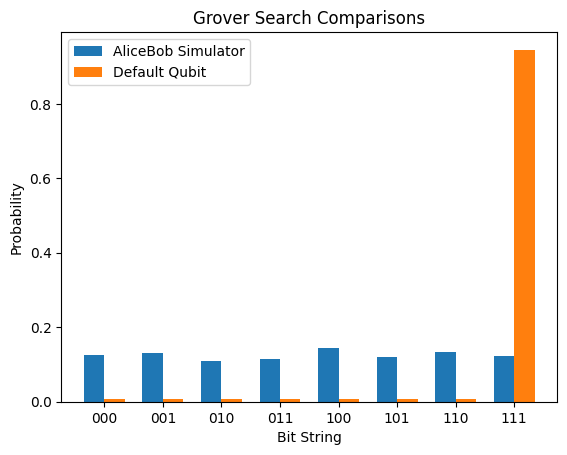

In [6]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Defining the oracle and the GroverSearch function
n_wires = 3
wires = list(range(n_wires))

def oracle():
    qml.Hadamard(wires[-1])
    qml.Toffoli(wires=wires)
    qml.Hadamard(wires[-1])

def GroverSearch(device, num_iterations=1):
    dev = device
    
    @qml.qnode(dev)
    def circuit():
        for wire in wires:
            qml.Hadamard(wire)

        for _ in range(num_iterations):
            oracle()
            qml.templates.GroverOperator(wires=wires)
        return qml.probs(wires)
    
    return circuit()

# Devices
alice_bob_dev = qml.device("alicebob.qubit", alice_backend="EMU:15Q:LOGICAL_EARLY", wires=3, average_nb_photons=4, kappa_2=1e4)
default_dev = qml.device("default.qubit", wires=3)

# Getting results from both devices
alicebob_results = GroverSearch(alice_bob_dev, num_iterations=2)
default_results = GroverSearch(default_dev, num_iterations=2)

# Generating bit strings for x-axis labels
bit_strings = [f"{x:0{n_wires}b}" for x in range(2**n_wires)]

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(alicebob_results))

bar1 = ax.bar(index, alicebob_results, bar_width, label='AliceBob Simulator')
bar2 = ax.bar(index + bar_width, default_results, bar_width, label='Default Qubit')

ax.set_xlabel('Bit String')
ax.set_ylabel('Probability')
ax.set_title('Grover Search Comparisons')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(bit_strings)
ax.legend()

plt.show()

In [9]:
circuit_depth = qml.depth
print(default_results)
print()
print('Total circuit depth:', circuit_depth)

AttributeError: module 'pennylane' has no attribute 'depth'

Using alice & bob EMU:15Q:LOGICAL_EARLY backend...


/home/ec2-user/anaconda3/envs/Braket/lib/python3.10/site-packages/pennylane/gradients/gradient_transform.py:293: UserWarning: Attempted to compute the gradient of a tape with no trainable parameters. If this is unintended, please mark trainable parameters in accordance with the chosen auto differentiation framework, or via the 'tape.trainable_params' property.
  warnings.warn(_no_trainable_grad_warning)


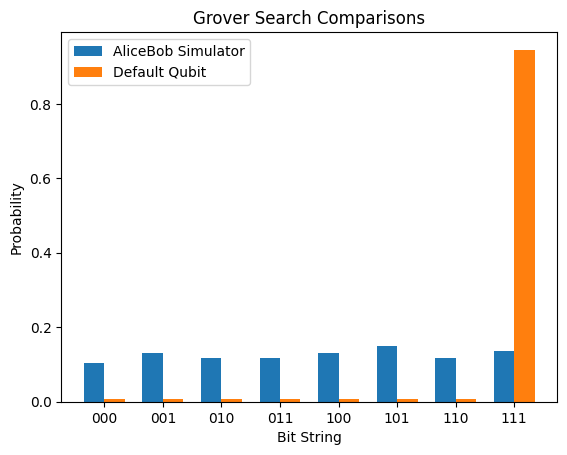

Alice & Bob Specs: {'resources': Resources(num_wires=3, num_gates=11, gate_types=defaultdict(<class 'int'>, {'Hadamard': 7, 'Toffoli': 2, 'GroverOperator': 2}), gate_sizes=defaultdict(<class 'int'>, {1: 7, 3: 4}), depth=9, shots=Shots(total_shots=1024, shot_vector=(ShotCopies(1024 shots x 1),))), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 0, 'num_device_wires': 3, 'device_name': 'qiskit.remote', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'pennylane.gradients.parameter_shift.param_shift', 'num_gradient_executions': 0}
Default Specs: {'resources': Resources(num_wires=3, num_gates=11, gate_types=defaultdict(<class 'int'>, {'Hadamard': 7, 'Toffoli': 2, 'GroverOperator': 2}), gate_sizes=defaultdict(<class 'int'>, {1: 7, 3: 4}), depth=9, shots=Shots(total_shots=None, shot_vector=())), 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 0, 'num_device_wires': 3, '

In [18]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Defining the oracle and the GroverSearch function
n_wires = 3
wires = list(range(n_wires))
def oracle():
    qml.Hadamard(wires[-1])
    qml.Toffoli(wires=wires)
    qml.Hadamard(wires[-1])

def GroverSearch(device, num_iterations=1):
    dev = device
    
    @qml.qnode(dev)
    def circuit():
        for wire in wires:
            qml.Hadamard(wire)

        for _ in range(num_iterations):
            oracle()
            qml.templates.GroverOperator(wires=wires)
        return qml.probs(wires)
    specs_func = qml.specs(circuit)
    return circuit(), specs_func()

# Devices
alice_bob_dev = qml.device("alicebob.qubit", alice_backend="EMU:15Q:LOGICAL_EARLY", wires=3, average_nb_photons=4, kappa_2=1e4)
default_dev = qml.device("default.qubit", wires=3)

# Getting results from both devices
alicebob_results, alice_specs = GroverSearch(alice_bob_dev, num_iterations=2)
default_results, default_specs = GroverSearch(default_dev, num_iterations=2)

# Generating bit strings for x-axis labels
bit_strings = [f"{x:0{n_wires}b}" for x in range(2**n_wires)]

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(alicebob_results))

bar1 = ax.bar(index, alicebob_results, bar_width, label='AliceBob Simulator')
bar2 = ax.bar(index + bar_width, default_results, bar_width, label='Default Qubit')

ax.set_xlabel('Bit String')
ax.set_ylabel('Probability')
ax.set_title('Grover Search Comparisons')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(bit_strings)
ax.legend()

plt.show()

print('Alice & Bob Specs:', alice_specs)
print('Default Specs:', default_specs)